In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../Data/clean_data.csv')
data = data.to_numpy()
data = np.delete(data, 8, 1)
data = np.delete(data, 8, 1)
data = data.astype('float64')
np.random.shuffle(data)
class_label = data[:, -1] # for last column
class_label = class_label.astype('int64') 
data = data[:, :-1] # for all but last column

In [3]:
print(data.shape)
print(class_label.shape)

(51598, 9)
(51598,)


Separate data into training data and testing data

In [4]:
x_train = data[0:49000, :]
y_train = class_label[0:49000] 
x_val = data[49000:50000, :]
y_val = class_label[49000:50000] 
x_test = data[50000:, :]
y_test = class_label[50000:] 

In [5]:
print("Training Set Data  Shape: ", x_train.shape)
print("Training Set Label Shape: ", y_train.shape)
print("Validation Set Data  Shape: ", x_val.shape)
print("Validation Set Label Shape: ", y_val.shape)
print("Test Set Data  Shape: ", x_test.shape)
print("Test Set Label Shape: ", y_test.shape)

Training Set Data  Shape:  (49000, 9)
Training Set Label Shape:  (49000,)
Validation Set Data  Shape:  (1000, 9)
Validation Set Label Shape:  (1000,)
Test Set Data  Shape:  (1598, 9)
Test Set Label Shape:  (1598,)


In [6]:
# Import more utilies and the layers you have implemented
from MLP.sequential import Sequential
from MLP.linear import Linear
from MLP.relu import ReLU
from MLP.softmax import Softmax
from MLP.loss_func import CrossEntropyLoss
from MLP.optimizer import SGD
from MLP.dataset import DataLoader
from MLP.trainer import Trainer

In [7]:
# test-case 1:
input_size = 9
hidden_size = 5 # Hidden layer size (Hyper-parameter)
num_classes = 2 # Output

def init_model():
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)
    
    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net_1 = init_model()
optim = SGD(net_1, lr=0.0015, weight_decay=0.000)
loss_func = CrossEntropyLoss()
epoch = 6000
batch_size = 1225

#Initialize the trainer class by passing the above modules
trainer = Trainer(dataset, optim, net_1, loss_func, epoch, batch_size, validate_interval=3)

train_error_1, validation_accuracy_1 = trainer.train()

Epoch Average Loss: 0.693137354859490
Validate Acc: 0.508 Epoch: 0
Epoch Average Loss: 0.693118649312261
Epoch Average Loss: 0.693100844742458
Epoch Average Loss: 0.693084014177649
Validate Acc: 0.508 Epoch: 3
Epoch Average Loss: 0.693067805988479
Epoch Average Loss: 0.693051253686884
Epoch Average Loss: 0.693034034089077
Validate Acc: 0.508 Epoch: 6
Epoch Average Loss: 0.693013846379107
Epoch Average Loss: 0.692987460922139
Epoch Average Loss: 0.692947917763038
Validate Acc: 0.508 Epoch: 9
Epoch Average Loss: 0.692883426251294
Epoch Average Loss: 0.692775549739541
Epoch Average Loss: 0.692597832104144
Validate Acc: 0.508 Epoch: 12
Epoch Average Loss: 0.692320765537060
Epoch Average Loss: 0.691917494163529
Epoch Average Loss: 0.691326762994975
Validate Acc: 0.508 Epoch: 15
Epoch Average Loss: 0.690430712695407
Epoch Average Loss: 0.689042797106769
Epoch Average Loss: 0.687124452916589
Validate Acc: 0.508 Epoch: 18
Epoch Average Loss: 0.684919461473301
Epoch Average Loss: 0.682803359717

Epoch Average Loss: 0.667832197675936
Epoch Average Loss: 0.667821323529135
Validate Acc: 0.629 Epoch: 174
Epoch Average Loss: 0.667709091196585
Epoch Average Loss: 0.667705009466647
Epoch Average Loss: 0.667772184496965
Validate Acc: 0.626 Epoch: 177
Epoch Average Loss: 0.667792218164428
Epoch Average Loss: 0.667683399639050
Epoch Average Loss: 0.667808850028782
Validate Acc: 0.629 Epoch: 180
Epoch Average Loss: 0.667727141820471
Epoch Average Loss: 0.667741575446597
Epoch Average Loss: 0.667730063324723
Validate Acc: 0.629 Epoch: 183
Epoch Average Loss: 0.667697600239957
Epoch Average Loss: 0.667734495972776
Epoch Average Loss: 0.667669089908925
Validate Acc: 0.628 Epoch: 186
Epoch Average Loss: 0.667675725112145
Epoch Average Loss: 0.667699173626777
Epoch Average Loss: 0.667648874989893
Validate Acc: 0.628 Epoch: 189
Epoch Average Loss: 0.667716193186684
Epoch Average Loss: 0.667634097337338
Epoch Average Loss: 0.667707500002126
Validate Acc: 0.631 Epoch: 192
Epoch Average Loss: 0.6

Epoch Average Loss: 0.667019591983726
Epoch Average Loss: 0.667041973742939
Validate Acc: 0.624 Epoch: 351
Epoch Average Loss: 0.666947912486452
Epoch Average Loss: 0.667030980155725
Epoch Average Loss: 0.667017543944551
Validate Acc: 0.627 Epoch: 354
Epoch Average Loss: 0.666977689405095
Epoch Average Loss: 0.666967764805238
Epoch Average Loss: 0.667043058579327
Validate Acc: 0.627 Epoch: 357
Epoch Average Loss: 0.667020377498000
Epoch Average Loss: 0.667008866350301
Epoch Average Loss: 0.666977989279998
Validate Acc: 0.631 Epoch: 360
Epoch Average Loss: 0.666917869664592
Epoch Average Loss: 0.666964173205529
Epoch Average Loss: 0.667024802701434
Validate Acc: 0.629 Epoch: 363
Epoch Average Loss: 0.667058740684151
Epoch Average Loss: 0.666948359769855
Epoch Average Loss: 0.666895847815903
Validate Acc: 0.618 Epoch: 366
Epoch Average Loss: 0.666892811446610
Epoch Average Loss: 0.666972705549570
Epoch Average Loss: 0.666956183103040
Validate Acc: 0.629 Epoch: 369
Epoch Average Loss: 0.6

Epoch Average Loss: 0.666637991804551
Validate Acc: 0.626 Epoch: 522
Epoch Average Loss: 0.666666058942688
Epoch Average Loss: 0.666600052991328
Epoch Average Loss: 0.666563939810700
Validate Acc: 0.628 Epoch: 525
Epoch Average Loss: 0.666537960965769
Epoch Average Loss: 0.666659366263638
Epoch Average Loss: 0.666566017390556
Validate Acc: 0.626 Epoch: 528
Epoch Average Loss: 0.666605647725191
Epoch Average Loss: 0.666561778755517
Epoch Average Loss: 0.666563546968788
Validate Acc: 0.628 Epoch: 531
Epoch Average Loss: 0.666574619713854
Epoch Average Loss: 0.666590358711618
Epoch Average Loss: 0.666482783166709
Validate Acc: 0.622 Epoch: 534
Epoch Average Loss: 0.666646733636816
Epoch Average Loss: 0.666535730723937
Epoch Average Loss: 0.666544337935548
Validate Acc: 0.622 Epoch: 537
Epoch Average Loss: 0.666624631030760
Epoch Average Loss: 0.666498989892294
Epoch Average Loss: 0.666586956327013
Validate Acc: 0.626 Epoch: 540
Epoch Average Loss: 0.666303457151872
Epoch Average Loss: 0.6

Validate Acc: 0.619 Epoch: 693
Epoch Average Loss: 0.666298703920034
Epoch Average Loss: 0.666286245393366
Epoch Average Loss: 0.666289347305437
Validate Acc: 0.629 Epoch: 696
Epoch Average Loss: 0.666275661749497
Epoch Average Loss: 0.666281615033642
Epoch Average Loss: 0.666265501745932
Validate Acc: 0.619 Epoch: 699
Epoch Average Loss: 0.666320560737229
Epoch Average Loss: 0.666285459080509
Epoch Average Loss: 0.666268611254914
Validate Acc: 0.629 Epoch: 702
Epoch Average Loss: 0.666263641068161
Epoch Average Loss: 0.666246253334048
Epoch Average Loss: 0.666299590643151
Validate Acc: 0.620 Epoch: 705
Epoch Average Loss: 0.666389270760660
Epoch Average Loss: 0.666324585722488
Epoch Average Loss: 0.666315581887814
Validate Acc: 0.624 Epoch: 708
Epoch Average Loss: 0.666282201442652
Epoch Average Loss: 0.666305761158444
Epoch Average Loss: 0.666322799678965
Validate Acc: 0.622 Epoch: 711
Epoch Average Loss: 0.666293158047142
Epoch Average Loss: 0.666320662512074
Epoch Average Loss: 0.6

Epoch Average Loss: 0.666091581407631
Validate Acc: 0.628 Epoch: 867
Epoch Average Loss: 0.666186462411953
Epoch Average Loss: 0.666174954159375
Epoch Average Loss: 0.666130894267722
Validate Acc: 0.629 Epoch: 870
Epoch Average Loss: 0.666077472584825
Epoch Average Loss: 0.666143814915530
Epoch Average Loss: 0.666085642902779
Validate Acc: 0.623 Epoch: 873
Epoch Average Loss: 0.666074654377174
Epoch Average Loss: 0.666129394765828
Epoch Average Loss: 0.666188442107081
Validate Acc: 0.623 Epoch: 876
Epoch Average Loss: 0.666169755149985
Epoch Average Loss: 0.666153798896631
Epoch Average Loss: 0.666101036680951
Validate Acc: 0.621 Epoch: 879
Epoch Average Loss: 0.666134906871990
Epoch Average Loss: 0.666104715373591
Epoch Average Loss: 0.666122573950379
Validate Acc: 0.622 Epoch: 882
Epoch Average Loss: 0.666187243196686
Epoch Average Loss: 0.666158192790314
Epoch Average Loss: 0.666116124134015
Validate Acc: 0.627 Epoch: 885
Epoch Average Loss: 0.666106652208404
Epoch Average Loss: 0.6

Epoch Average Loss: 0.665937570863479
Epoch Average Loss: 0.666067392711599
Validate Acc: 0.616 Epoch: 1050
Epoch Average Loss: 0.665965548600830
Epoch Average Loss: 0.666066726918857
Epoch Average Loss: 0.666127276356484
Validate Acc: 0.630 Epoch: 1053
Epoch Average Loss: 0.666024104999656
Epoch Average Loss: 0.665992159790745
Epoch Average Loss: 0.665959095449341
Validate Acc: 0.619 Epoch: 1056
Epoch Average Loss: 0.666102703840914
Epoch Average Loss: 0.665967075116175
Epoch Average Loss: 0.666035458231691
Validate Acc: 0.621 Epoch: 1059
Epoch Average Loss: 0.665942514603078
Epoch Average Loss: 0.665904065002625
Epoch Average Loss: 0.666083405019121
Validate Acc: 0.624 Epoch: 1062
Epoch Average Loss: 0.665988028804238
Epoch Average Loss: 0.666108234570930
Epoch Average Loss: 0.666021011596966
Validate Acc: 0.620 Epoch: 1065
Epoch Average Loss: 0.666020972838351
Epoch Average Loss: 0.665936458828423
Epoch Average Loss: 0.665853624968886
Validate Acc: 0.628 Epoch: 1068
Epoch Average Lo

Epoch Average Loss: 0.666124080469414
Validate Acc: 0.626 Epoch: 1224
Epoch Average Loss: 0.665998674551241
Epoch Average Loss: 0.665995439288775
Epoch Average Loss: 0.665965124478288
Validate Acc: 0.630 Epoch: 1227
Epoch Average Loss: 0.666020214240739
Epoch Average Loss: 0.666011098073087
Epoch Average Loss: 0.665924325948713
Validate Acc: 0.629 Epoch: 1230
Epoch Average Loss: 0.665986142824257
Epoch Average Loss: 0.665873423165572
Epoch Average Loss: 0.665885903812204
Validate Acc: 0.615 Epoch: 1233
Epoch Average Loss: 0.665943729447327
Epoch Average Loss: 0.665956172294278
Epoch Average Loss: 0.665800980726555
Validate Acc: 0.618 Epoch: 1236
Epoch Average Loss: 0.665824457412653
Epoch Average Loss: 0.665942610466314
Epoch Average Loss: 0.665937680755543
Validate Acc: 0.617 Epoch: 1239
Epoch Average Loss: 0.666036409789366
Epoch Average Loss: 0.665892337555315
Epoch Average Loss: 0.665907536571053
Validate Acc: 0.620 Epoch: 1242
Epoch Average Loss: 0.665991385941221
Epoch Average Lo

Epoch Average Loss: 0.665934961720492
Validate Acc: 0.629 Epoch: 1401
Epoch Average Loss: 0.665874266535777
Epoch Average Loss: 0.665861113342370
Epoch Average Loss: 0.665867055983062
Validate Acc: 0.628 Epoch: 1404
Epoch Average Loss: 0.665877190899006
Epoch Average Loss: 0.665919972901874
Epoch Average Loss: 0.665838510261665
Validate Acc: 0.623 Epoch: 1407
Epoch Average Loss: 0.665939083911961
Epoch Average Loss: 0.665980686219915
Epoch Average Loss: 0.665849548731339
Validate Acc: 0.625 Epoch: 1410
Epoch Average Loss: 0.665960049392752
Epoch Average Loss: 0.665902114715076
Epoch Average Loss: 0.665948733121755
Validate Acc: 0.626 Epoch: 1413
Epoch Average Loss: 0.665798139274874
Epoch Average Loss: 0.665909434458523
Epoch Average Loss: 0.665872761465284
Validate Acc: 0.628 Epoch: 1416
Epoch Average Loss: 0.665870222781936
Epoch Average Loss: 0.665810180551225
Epoch Average Loss: 0.665822214440297
Validate Acc: 0.626 Epoch: 1419
Epoch Average Loss: 0.665824770482051
Epoch Average Lo

Validate Acc: 0.625 Epoch: 1572
Epoch Average Loss: 0.665777517453624
Epoch Average Loss: 0.665888087620701
Epoch Average Loss: 0.665792397922587
Validate Acc: 0.621 Epoch: 1575
Epoch Average Loss: 0.666016398527611
Epoch Average Loss: 0.665775696977174
Epoch Average Loss: 0.665789284366464
Validate Acc: 0.622 Epoch: 1578
Epoch Average Loss: 0.665838574062735
Epoch Average Loss: 0.665770195096623
Epoch Average Loss: 0.665811215721011
Validate Acc: 0.625 Epoch: 1581
Epoch Average Loss: 0.665852956208061
Epoch Average Loss: 0.665819504088219
Epoch Average Loss: 0.665796410206249
Validate Acc: 0.628 Epoch: 1584
Epoch Average Loss: 0.665807324293345
Epoch Average Loss: 0.665860129616919
Epoch Average Loss: 0.665755291872089
Validate Acc: 0.625 Epoch: 1587
Epoch Average Loss: 0.665928353123045
Epoch Average Loss: 0.665838512025767
Epoch Average Loss: 0.665736698098285
Validate Acc: 0.631 Epoch: 1590
Epoch Average Loss: 0.665829641013012
Epoch Average Loss: 0.665745339602682
Epoch Average Lo

Epoch Average Loss: 0.665890989880783
Epoch Average Loss: 0.665764970048493
Validate Acc: 0.629 Epoch: 1743
Epoch Average Loss: 0.665745140905344
Epoch Average Loss: 0.665903075211160
Epoch Average Loss: 0.665866685125603
Validate Acc: 0.631 Epoch: 1746
Epoch Average Loss: 0.665803295054311
Epoch Average Loss: 0.665777654771336
Epoch Average Loss: 0.665719904312511
Validate Acc: 0.628 Epoch: 1749
Epoch Average Loss: 0.665798237812727
Epoch Average Loss: 0.665795356485048
Epoch Average Loss: 0.665778318345405
Validate Acc: 0.621 Epoch: 1752
Epoch Average Loss: 0.665811723329579
Epoch Average Loss: 0.665777180069768
Epoch Average Loss: 0.665760410147976
Validate Acc: 0.627 Epoch: 1755
Epoch Average Loss: 0.665733507779955
Epoch Average Loss: 0.665723157000394
Epoch Average Loss: 0.665808006625306
Validate Acc: 0.626 Epoch: 1758
Epoch Average Loss: 0.665716262116391
Epoch Average Loss: 0.665806528168732
Epoch Average Loss: 0.665742485105575
Validate Acc: 0.622 Epoch: 1761
Epoch Average Lo

Epoch Average Loss: 0.665743240619254
Epoch Average Loss: 0.665763503615708
Validate Acc: 0.626 Epoch: 1917
Epoch Average Loss: 0.665660488708532
Epoch Average Loss: 0.665670838899958
Epoch Average Loss: 0.665769710629742
Validate Acc: 0.624 Epoch: 1920
Epoch Average Loss: 0.665699820467011
Epoch Average Loss: 0.665740726588163
Epoch Average Loss: 0.665657276247534
Validate Acc: 0.620 Epoch: 1923
Epoch Average Loss: 0.665779510990502
Epoch Average Loss: 0.665723393816391
Epoch Average Loss: 0.665735642380304
Validate Acc: 0.629 Epoch: 1926
Epoch Average Loss: 0.665785636396097
Epoch Average Loss: 0.665777947388980
Epoch Average Loss: 0.665699879839317
Validate Acc: 0.629 Epoch: 1929
Epoch Average Loss: 0.665753921876337
Epoch Average Loss: 0.665713066801617
Epoch Average Loss: 0.665764224376345
Validate Acc: 0.621 Epoch: 1932
Epoch Average Loss: 0.665768378025216
Epoch Average Loss: 0.665825907356002
Epoch Average Loss: 0.665800204379884
Validate Acc: 0.629 Epoch: 1935
Epoch Average Lo

Epoch Average Loss: 0.665768193712569
Validate Acc: 0.619 Epoch: 2094
Epoch Average Loss: 0.665704068385193
Epoch Average Loss: 0.665774042995777
Epoch Average Loss: 0.665672860673722
Validate Acc: 0.622 Epoch: 2097
Epoch Average Loss: 0.665743184240621
Epoch Average Loss: 0.665802182886811
Epoch Average Loss: 0.665783820184354
Validate Acc: 0.620 Epoch: 2100
Epoch Average Loss: 0.665675764377853
Epoch Average Loss: 0.665622254419818
Epoch Average Loss: 0.665668790673233
Validate Acc: 0.623 Epoch: 2103
Epoch Average Loss: 0.665687723103933
Epoch Average Loss: 0.665726559581373
Epoch Average Loss: 0.665686910183265
Validate Acc: 0.621 Epoch: 2106
Epoch Average Loss: 0.665680318767986
Epoch Average Loss: 0.665665002979779
Epoch Average Loss: 0.665733130787027
Validate Acc: 0.621 Epoch: 2109
Epoch Average Loss: 0.665729337794616
Epoch Average Loss: 0.665738438299354
Epoch Average Loss: 0.665684699987976
Validate Acc: 0.623 Epoch: 2112
Epoch Average Loss: 0.665840339624024
Epoch Average Lo

Epoch Average Loss: 0.665728827296936
Epoch Average Loss: 0.665720046254414
Validate Acc: 0.628 Epoch: 2265
Epoch Average Loss: 0.665651784120186
Epoch Average Loss: 0.665689126261968
Epoch Average Loss: 0.665671365942661
Validate Acc: 0.619 Epoch: 2268
Epoch Average Loss: 0.665593454042446
Epoch Average Loss: 0.665631434841583
Epoch Average Loss: 0.665652872684001
Validate Acc: 0.628 Epoch: 2271
Epoch Average Loss: 0.665649291144745
Epoch Average Loss: 0.665672930618443
Epoch Average Loss: 0.665660707267371
Validate Acc: 0.620 Epoch: 2274
Epoch Average Loss: 0.665589849758720
Epoch Average Loss: 0.665768750436827
Epoch Average Loss: 0.665663738130397
Validate Acc: 0.628 Epoch: 2277
Epoch Average Loss: 0.665676398548023
Epoch Average Loss: 0.665676438936536
Epoch Average Loss: 0.665751110799671
Validate Acc: 0.630 Epoch: 2280
Epoch Average Loss: 0.665621831266994
Epoch Average Loss: 0.665604485006009
Epoch Average Loss: 0.665556346239102
Validate Acc: 0.623 Epoch: 2283
Epoch Average Lo

Validate Acc: 0.628 Epoch: 2439
Epoch Average Loss: 0.665654142900917
Epoch Average Loss: 0.665597520815997
Epoch Average Loss: 0.665684609225409
Validate Acc: 0.621 Epoch: 2442
Epoch Average Loss: 0.665564247043506
Epoch Average Loss: 0.665671884438870
Epoch Average Loss: 0.665680310771698
Validate Acc: 0.627 Epoch: 2445
Epoch Average Loss: 0.665661141386377
Epoch Average Loss: 0.665662911005712
Epoch Average Loss: 0.665590654913593
Validate Acc: 0.629 Epoch: 2448
Epoch Average Loss: 0.665640533840965
Epoch Average Loss: 0.665682550663671
Epoch Average Loss: 0.665548885352532
Validate Acc: 0.626 Epoch: 2451
Epoch Average Loss: 0.665631433882315
Epoch Average Loss: 0.665644455256624
Epoch Average Loss: 0.665609431245804
Validate Acc: 0.624 Epoch: 2454
Epoch Average Loss: 0.665708891691404
Epoch Average Loss: 0.665700074672562
Epoch Average Loss: 0.665601630480004
Validate Acc: 0.629 Epoch: 2457
Epoch Average Loss: 0.665602270805822
Epoch Average Loss: 0.665650261945357
Epoch Average Lo

Epoch Average Loss: 0.665643780587324
Epoch Average Loss: 0.665588075478857
Validate Acc: 0.628 Epoch: 2616
Epoch Average Loss: 0.665583933427848
Epoch Average Loss: 0.665654460327187
Epoch Average Loss: 0.665657902881483
Validate Acc: 0.622 Epoch: 2619
Epoch Average Loss: 0.665623594799005
Epoch Average Loss: 0.665634488794695
Epoch Average Loss: 0.665574123531704
Validate Acc: 0.628 Epoch: 2622
Epoch Average Loss: 0.665650844422056
Epoch Average Loss: 0.665498283217952
Epoch Average Loss: 0.665591177888621
Validate Acc: 0.628 Epoch: 2625
Epoch Average Loss: 0.665604531924641
Epoch Average Loss: 0.665630539881061
Epoch Average Loss: 0.665614164797836
Validate Acc: 0.628 Epoch: 2628
Epoch Average Loss: 0.665594212447364
Epoch Average Loss: 0.665514915415440
Epoch Average Loss: 0.665553255653829
Validate Acc: 0.622 Epoch: 2631
Epoch Average Loss: 0.665664925848904
Epoch Average Loss: 0.665568971089447
Epoch Average Loss: 0.665640302434729
Validate Acc: 0.623 Epoch: 2634
Epoch Average Lo

Validate Acc: 0.627 Epoch: 2790
Epoch Average Loss: 0.665502322444449
Epoch Average Loss: 0.665612570591631
Epoch Average Loss: 0.665599064085366
Validate Acc: 0.620 Epoch: 2793
Epoch Average Loss: 0.665563359155300
Epoch Average Loss: 0.665600497344513
Epoch Average Loss: 0.665646765951483
Validate Acc: 0.622 Epoch: 2796
Epoch Average Loss: 0.665608712024556
Epoch Average Loss: 0.665617290066662
Epoch Average Loss: 0.665601845270112
Validate Acc: 0.615 Epoch: 2799
Epoch Average Loss: 0.665575531349211
Epoch Average Loss: 0.665601099605831
Epoch Average Loss: 0.665612732067000
Validate Acc: 0.629 Epoch: 2802
Epoch Average Loss: 0.665566109361900
Epoch Average Loss: 0.665584604008539
Epoch Average Loss: 0.665578334105372
Validate Acc: 0.626 Epoch: 2805
Epoch Average Loss: 0.665613020728116
Epoch Average Loss: 0.665563715251697
Epoch Average Loss: 0.665663674543176
Validate Acc: 0.625 Epoch: 2808
Epoch Average Loss: 0.665505065622519
Epoch Average Loss: 0.665608152189022
Epoch Average Lo

Epoch Average Loss: 0.665582752652186
Epoch Average Loss: 0.665571898607960
Epoch Average Loss: 0.665578884737076
Validate Acc: 0.630 Epoch: 2970
Epoch Average Loss: 0.665555219962514
Epoch Average Loss: 0.665551385141619
Epoch Average Loss: 0.665590201563844
Validate Acc: 0.625 Epoch: 2973
Epoch Average Loss: 0.665538049232337
Epoch Average Loss: 0.665644761879678
Epoch Average Loss: 0.665480656615237
Validate Acc: 0.626 Epoch: 2976
Epoch Average Loss: 0.665611254191261
Epoch Average Loss: 0.665474800716842
Epoch Average Loss: 0.665494981425647
Validate Acc: 0.628 Epoch: 2979
Epoch Average Loss: 0.665566077956485
Epoch Average Loss: 0.665519782913396
Epoch Average Loss: 0.665573644786141
Validate Acc: 0.627 Epoch: 2982
Epoch Average Loss: 0.665624209300703
Epoch Average Loss: 0.665569440549283
Epoch Average Loss: 0.665547482932257
Validate Acc: 0.623 Epoch: 2985
Epoch Average Loss: 0.665606057892849
Epoch Average Loss: 0.665619876883891
Epoch Average Loss: 0.665581787049417
Validate A

Epoch Average Loss: 0.665499374026591
Epoch Average Loss: 0.665586032848676
Validate Acc: 0.630 Epoch: 3144
Epoch Average Loss: 0.665462776242359
Epoch Average Loss: 0.665502000659404
Epoch Average Loss: 0.665584870539955
Validate Acc: 0.622 Epoch: 3147
Epoch Average Loss: 0.665545935343640
Epoch Average Loss: 0.665387522837070
Epoch Average Loss: 0.665532279342296
Validate Acc: 0.630 Epoch: 3150
Epoch Average Loss: 0.665531698065699
Epoch Average Loss: 0.665541893856639
Epoch Average Loss: 0.665692064292965
Validate Acc: 0.620 Epoch: 3153
Epoch Average Loss: 0.665587586120552
Epoch Average Loss: 0.665485582970343
Epoch Average Loss: 0.665473999225321
Validate Acc: 0.621 Epoch: 3156
Epoch Average Loss: 0.665496261228927
Epoch Average Loss: 0.665597339440550
Epoch Average Loss: 0.665544261147471
Validate Acc: 0.624 Epoch: 3159
Epoch Average Loss: 0.665588496153681
Epoch Average Loss: 0.665501189282639
Epoch Average Loss: 0.665504591262805
Validate Acc: 0.621 Epoch: 3162
Epoch Average Lo

Epoch Average Loss: 0.665548897491820
Epoch Average Loss: 0.665588270077344
Validate Acc: 0.625 Epoch: 3324
Epoch Average Loss: 0.665483625956478
Epoch Average Loss: 0.665479781087446
Epoch Average Loss: 0.665585759628923
Validate Acc: 0.630 Epoch: 3327
Epoch Average Loss: 0.665531693903671
Epoch Average Loss: 0.665561780796281
Epoch Average Loss: 0.665594267811678
Validate Acc: 0.630 Epoch: 3330
Epoch Average Loss: 0.665557042943761
Epoch Average Loss: 0.665454106612994
Epoch Average Loss: 0.665439601856308
Validate Acc: 0.621 Epoch: 3333
Epoch Average Loss: 0.665521900505383
Epoch Average Loss: 0.665522201690931
Epoch Average Loss: 0.665630446893178
Validate Acc: 0.628 Epoch: 3336
Epoch Average Loss: 0.665557808186786
Epoch Average Loss: 0.665459059362891
Epoch Average Loss: 0.665437695177181
Validate Acc: 0.625 Epoch: 3339
Epoch Average Loss: 0.665505734075502
Epoch Average Loss: 0.665521720497448
Epoch Average Loss: 0.665460993934797
Validate Acc: 0.620 Epoch: 3342
Epoch Average Lo

Epoch Average Loss: 0.665618137531299
Validate Acc: 0.624 Epoch: 3666
Epoch Average Loss: 0.665383924603478
Epoch Average Loss: 0.665469230029858
Epoch Average Loss: 0.665408269039883
Validate Acc: 0.622 Epoch: 3669
Epoch Average Loss: 0.665429429481359
Epoch Average Loss: 0.665481531719620
Epoch Average Loss: 0.665470507149642
Validate Acc: 0.624 Epoch: 3672
Epoch Average Loss: 0.665430664505953
Epoch Average Loss: 0.665458750531349
Epoch Average Loss: 0.665486243199881
Validate Acc: 0.622 Epoch: 3675
Epoch Average Loss: 0.665441363345978
Epoch Average Loss: 0.665516019583239
Epoch Average Loss: 0.665501880425814
Validate Acc: 0.629 Epoch: 3678
Epoch Average Loss: 0.665430855636353
Epoch Average Loss: 0.665423205432962
Epoch Average Loss: 0.665510836885269
Validate Acc: 0.624 Epoch: 3681
Epoch Average Loss: 0.665472257664641
Epoch Average Loss: 0.665488945647125
Epoch Average Loss: 0.665446145176237
Validate Acc: 0.618 Epoch: 3684
Epoch Average Loss: 0.665578557729358
Epoch Average Lo

Epoch Average Loss: 0.665408502300209
Validate Acc: 0.625 Epoch: 3843
Epoch Average Loss: 0.665344832571913
Epoch Average Loss: 0.665348133379233
Epoch Average Loss: 0.665403374719859
Validate Acc: 0.624 Epoch: 3846
Epoch Average Loss: 0.665434075383467
Epoch Average Loss: 0.665431405950092
Epoch Average Loss: 0.665420197443216
Validate Acc: 0.623 Epoch: 3849
Epoch Average Loss: 0.665426020831418
Epoch Average Loss: 0.665313854901806
Epoch Average Loss: 0.665365605182109
Validate Acc: 0.623 Epoch: 3852
Epoch Average Loss: 0.665414329152325
Epoch Average Loss: 0.665427118570715
Epoch Average Loss: 0.665496750928338
Validate Acc: 0.625 Epoch: 3855
Epoch Average Loss: 0.665432536830331
Epoch Average Loss: 0.665512553665738
Epoch Average Loss: 0.665382611572930
Validate Acc: 0.621 Epoch: 3858
Epoch Average Loss: 0.665465287722809
Epoch Average Loss: 0.665403626188154
Epoch Average Loss: 0.665492527302632
Validate Acc: 0.623 Epoch: 3861
Epoch Average Loss: 0.665401179135975
Epoch Average Lo

Epoch Average Loss: 0.665403912382941
Epoch Average Loss: 0.665433512555358
Epoch Average Loss: 0.665400285270488
Validate Acc: 0.624 Epoch: 4020
Epoch Average Loss: 0.665407351957917
Epoch Average Loss: 0.665421227863365
Epoch Average Loss: 0.665490817005406
Validate Acc: 0.621 Epoch: 4023
Epoch Average Loss: 0.665413387393522
Epoch Average Loss: 0.665417577256848
Epoch Average Loss: 0.665501259495344
Validate Acc: 0.624 Epoch: 4026
Epoch Average Loss: 0.665402612286823
Epoch Average Loss: 0.665451464269044
Epoch Average Loss: 0.665466638255727
Validate Acc: 0.625 Epoch: 4029
Epoch Average Loss: 0.665535211005487
Epoch Average Loss: 0.665455185308520
Epoch Average Loss: 0.665408933054274
Validate Acc: 0.624 Epoch: 4032
Epoch Average Loss: 0.665418436775887
Epoch Average Loss: 0.665345229586305
Epoch Average Loss: 0.665459105963989
Validate Acc: 0.624 Epoch: 4035
Epoch Average Loss: 0.665367918430329
Epoch Average Loss: 0.665418032348314
Epoch Average Loss: 0.665366293332390
Validate A

Epoch Average Loss: 0.665409355252491
Epoch Average Loss: 0.665522204197683
Validate Acc: 0.628 Epoch: 4197
Epoch Average Loss: 0.665436114312415
Epoch Average Loss: 0.665355373339516
Epoch Average Loss: 0.665467361478061
Validate Acc: 0.624 Epoch: 4200
Epoch Average Loss: 0.665338484312216
Epoch Average Loss: 0.665405289209209
Epoch Average Loss: 0.665437609404594
Validate Acc: 0.625 Epoch: 4203
Epoch Average Loss: 0.665334375828875
Epoch Average Loss: 0.665422719186431
Epoch Average Loss: 0.665466349701009
Validate Acc: 0.627 Epoch: 4206
Epoch Average Loss: 0.665404348280401
Epoch Average Loss: 0.665252075335757
Epoch Average Loss: 0.665342285926485
Validate Acc: 0.625 Epoch: 4209
Epoch Average Loss: 0.665377628722060
Epoch Average Loss: 0.665410359431227
Epoch Average Loss: 0.665440944317236
Validate Acc: 0.621 Epoch: 4212
Epoch Average Loss: 0.665251567665031
Epoch Average Loss: 0.665473161579368
Epoch Average Loss: 0.665475458552898
Validate Acc: 0.626 Epoch: 4215
Epoch Average Lo

Epoch Average Loss: 0.665369085299372
Epoch Average Loss: 0.665405861548861
Validate Acc: 0.617 Epoch: 4371
Epoch Average Loss: 0.665384114889042
Epoch Average Loss: 0.665348405272088
Epoch Average Loss: 0.665436745842132
Validate Acc: 0.622 Epoch: 4374
Epoch Average Loss: 0.665452413092967
Epoch Average Loss: 0.665330052624449
Epoch Average Loss: 0.665376748037476
Validate Acc: 0.623 Epoch: 4377
Epoch Average Loss: 0.665329301731498
Epoch Average Loss: 0.665425702742458
Epoch Average Loss: 0.665370531954592
Validate Acc: 0.625 Epoch: 4380
Epoch Average Loss: 0.665445127248427
Epoch Average Loss: 0.665417314448091
Epoch Average Loss: 0.665338788296819
Validate Acc: 0.627 Epoch: 4383
Epoch Average Loss: 0.665350594814927
Epoch Average Loss: 0.665354986152591
Epoch Average Loss: 0.665297403088530
Validate Acc: 0.618 Epoch: 4386
Epoch Average Loss: 0.665472716755051
Epoch Average Loss: 0.665392761148823
Epoch Average Loss: 0.665314270891750
Validate Acc: 0.623 Epoch: 4389
Epoch Average Lo

Validate Acc: 0.622 Epoch: 4710
Epoch Average Loss: 0.665429574285419
Epoch Average Loss: 0.665434784077350
Epoch Average Loss: 0.665432997527145
Validate Acc: 0.623 Epoch: 4713
Epoch Average Loss: 0.665244428962712
Epoch Average Loss: 0.665442419507657
Epoch Average Loss: 0.665258486369107
Validate Acc: 0.622 Epoch: 4716
Epoch Average Loss: 0.665255401212301
Epoch Average Loss: 0.665312806770414
Epoch Average Loss: 0.665310016668961
Validate Acc: 0.627 Epoch: 4719
Epoch Average Loss: 0.665354541544645
Epoch Average Loss: 0.665386916006164
Epoch Average Loss: 0.665350580695294
Validate Acc: 0.620 Epoch: 4722
Epoch Average Loss: 0.665354639943891
Epoch Average Loss: 0.665363610434516
Epoch Average Loss: 0.665370037218938
Validate Acc: 0.623 Epoch: 4725
Epoch Average Loss: 0.665359818478545
Epoch Average Loss: 0.665363004825135
Epoch Average Loss: 0.665353173399800
Validate Acc: 0.624 Epoch: 4728
Epoch Average Loss: 0.665358358873119
Epoch Average Loss: 0.665270916777947
Epoch Average Lo

Epoch Average Loss: 0.665182822702011
Epoch Average Loss: 0.665460484652990
Validate Acc: 0.627 Epoch: 4887
Epoch Average Loss: 0.665421576218433
Epoch Average Loss: 0.665407935633124
Epoch Average Loss: 0.665232501051265
Validate Acc: 0.626 Epoch: 4890
Epoch Average Loss: 0.665362915723137
Epoch Average Loss: 0.665360184748531
Epoch Average Loss: 0.665321092140047
Validate Acc: 0.625 Epoch: 4893
Epoch Average Loss: 0.665299089376955
Epoch Average Loss: 0.665319077065413
Epoch Average Loss: 0.665326481919317
Validate Acc: 0.627 Epoch: 4896
Epoch Average Loss: 0.665364675298781
Epoch Average Loss: 0.665211591952959
Epoch Average Loss: 0.665290899447174
Validate Acc: 0.626 Epoch: 4899
Epoch Average Loss: 0.665366567750108
Epoch Average Loss: 0.665277042970473
Epoch Average Loss: 0.665311213154000
Validate Acc: 0.630 Epoch: 4902
Epoch Average Loss: 0.665307071070437
Epoch Average Loss: 0.665253397945087
Epoch Average Loss: 0.665315760662052
Validate Acc: 0.619 Epoch: 4905
Epoch Average Lo

Epoch Average Loss: 0.665317738395214
Validate Acc: 0.619 Epoch: 5055
Epoch Average Loss: 0.665353116704813
Epoch Average Loss: 0.665275922052278
Epoch Average Loss: 0.665238933606281
Validate Acc: 0.622 Epoch: 5058
Epoch Average Loss: 0.665278606789519
Epoch Average Loss: 0.665361406825980
Epoch Average Loss: 0.665307995670025
Validate Acc: 0.624 Epoch: 5061
Epoch Average Loss: 0.665246013153137
Epoch Average Loss: 0.665369610750153
Epoch Average Loss: 0.665314202872261
Validate Acc: 0.626 Epoch: 5064
Epoch Average Loss: 0.665244913072777
Epoch Average Loss: 0.665374585409625
Epoch Average Loss: 0.665277305563701
Validate Acc: 0.629 Epoch: 5067
Epoch Average Loss: 0.665323481806631
Epoch Average Loss: 0.665247412558244
Epoch Average Loss: 0.665286572647635
Validate Acc: 0.624 Epoch: 5070
Epoch Average Loss: 0.665225443932781
Epoch Average Loss: 0.665167021625627
Epoch Average Loss: 0.665227457560855
Validate Acc: 0.617 Epoch: 5073
Epoch Average Loss: 0.665236860041637
Epoch Average Lo

Validate Acc: 0.625 Epoch: 5223
Epoch Average Loss: 0.665268921248280
Epoch Average Loss: 0.665128901722030
Epoch Average Loss: 0.665315324236317
Validate Acc: 0.624 Epoch: 5226
Epoch Average Loss: 0.665299121881706
Epoch Average Loss: 0.665352404284387
Epoch Average Loss: 0.665376053753058
Validate Acc: 0.626 Epoch: 5229
Epoch Average Loss: 0.665369766090176
Epoch Average Loss: 0.665283696893905
Epoch Average Loss: 0.665294544577646
Validate Acc: 0.621 Epoch: 5232
Epoch Average Loss: 0.665232665659239
Epoch Average Loss: 0.665285670705595
Epoch Average Loss: 0.665363046581490
Validate Acc: 0.622 Epoch: 5235
Epoch Average Loss: 0.665210391275512
Epoch Average Loss: 0.665120011223420
Epoch Average Loss: 0.665424475517857
Validate Acc: 0.623 Epoch: 5238
Epoch Average Loss: 0.665339910494541
Epoch Average Loss: 0.665258659477455
Epoch Average Loss: 0.665246630580919
Validate Acc: 0.627 Epoch: 5241
Epoch Average Loss: 0.665348079808023
Epoch Average Loss: 0.665341050397936
Epoch Average Lo

Validate Acc: 0.622 Epoch: 5400
Epoch Average Loss: 0.665312922367739
Epoch Average Loss: 0.665323039813164
Epoch Average Loss: 0.665177746851418
Validate Acc: 0.623 Epoch: 5403
Epoch Average Loss: 0.665238901079505
Epoch Average Loss: 0.665427806966956
Epoch Average Loss: 0.665328744908276
Validate Acc: 0.621 Epoch: 5406
Epoch Average Loss: 0.665247337948634
Epoch Average Loss: 0.665207570165033
Epoch Average Loss: 0.665257516146574
Validate Acc: 0.624 Epoch: 5409
Epoch Average Loss: 0.665347738444156
Epoch Average Loss: 0.665365379720774
Epoch Average Loss: 0.665296400172435
Validate Acc: 0.619 Epoch: 5412
Epoch Average Loss: 0.665279418498296
Epoch Average Loss: 0.665215230784708
Epoch Average Loss: 0.665198430699621
Validate Acc: 0.625 Epoch: 5415
Epoch Average Loss: 0.665253147502387
Epoch Average Loss: 0.665308669934235
Epoch Average Loss: 0.665223761115800
Validate Acc: 0.619 Epoch: 5418
Epoch Average Loss: 0.665401027167426
Epoch Average Loss: 0.665289944426389
Epoch Average Lo

Epoch Average Loss: 0.665287124050581
Validate Acc: 0.624 Epoch: 5574
Epoch Average Loss: 0.665265998350873
Epoch Average Loss: 0.665299176527633
Epoch Average Loss: 0.665349899821258
Validate Acc: 0.624 Epoch: 5577
Epoch Average Loss: 0.665238733403613
Epoch Average Loss: 0.665232116256667
Epoch Average Loss: 0.665260949081413
Validate Acc: 0.623 Epoch: 5580
Epoch Average Loss: 0.665242285881034
Epoch Average Loss: 0.665167232186143
Epoch Average Loss: 0.665312078168037
Validate Acc: 0.629 Epoch: 5583
Epoch Average Loss: 0.665454241258274
Epoch Average Loss: 0.665235691047294
Epoch Average Loss: 0.665414783206570
Validate Acc: 0.620 Epoch: 5586
Epoch Average Loss: 0.665286966198358
Epoch Average Loss: 0.665274497613659
Epoch Average Loss: 0.665349899287578
Validate Acc: 0.626 Epoch: 5589
Epoch Average Loss: 0.665354828707068
Epoch Average Loss: 0.665208340982938
Epoch Average Loss: 0.665207074802691
Validate Acc: 0.621 Epoch: 5592
Epoch Average Loss: 0.665312137201754
Epoch Average Lo

Epoch Average Loss: 0.665324400485366
Epoch Average Loss: 0.665198583721784
Validate Acc: 0.622 Epoch: 5748
Epoch Average Loss: 0.665168867664454
Epoch Average Loss: 0.665204385970673
Epoch Average Loss: 0.665221722209827
Validate Acc: 0.621 Epoch: 5751
Epoch Average Loss: 0.665253093431122
Epoch Average Loss: 0.665377909574200
Epoch Average Loss: 0.665171804289793
Validate Acc: 0.623 Epoch: 5754
Epoch Average Loss: 0.665174009524307
Epoch Average Loss: 0.665162282997352
Epoch Average Loss: 0.665176702364010
Validate Acc: 0.619 Epoch: 5757
Epoch Average Loss: 0.665247625181921
Epoch Average Loss: 0.665241337410008
Epoch Average Loss: 0.665307349546716
Validate Acc: 0.615 Epoch: 5760
Epoch Average Loss: 0.665246737498929
Epoch Average Loss: 0.665243578303944
Epoch Average Loss: 0.665344338425001
Validate Acc: 0.628 Epoch: 5763
Epoch Average Loss: 0.665186100084696
Epoch Average Loss: 0.665217024311700
Epoch Average Loss: 0.665240884098067
Validate Acc: 0.627 Epoch: 5766
Epoch Average Lo

Epoch Average Loss: 0.665114773266980
Epoch Average Loss: 0.665234814867057
Validate Acc: 0.628 Epoch: 5925
Epoch Average Loss: 0.665199766851809
Epoch Average Loss: 0.665209095531163
Epoch Average Loss: 0.665286328175902
Validate Acc: 0.621 Epoch: 5928
Epoch Average Loss: 0.665257796038758
Epoch Average Loss: 0.665261582281522
Epoch Average Loss: 0.665180610150997
Validate Acc: 0.623 Epoch: 5931
Epoch Average Loss: 0.665291794131503
Epoch Average Loss: 0.665272663488351
Epoch Average Loss: 0.665332219951882
Validate Acc: 0.624 Epoch: 5934
Epoch Average Loss: 0.665216263152430
Epoch Average Loss: 0.665240479389446
Epoch Average Loss: 0.665241734719701
Validate Acc: 0.622 Epoch: 5937
Epoch Average Loss: 0.665220247254353
Epoch Average Loss: 0.665300595823807
Epoch Average Loss: 0.665272456844682
Validate Acc: 0.624 Epoch: 5940
Epoch Average Loss: 0.665255381744655
Epoch Average Loss: 0.665217705676306
Epoch Average Loss: 0.665189734927187
Validate Acc: 0.624 Epoch: 5943
Epoch Average Lo

Training acc:  0.6030816326530613
Validation acc:  0.619
Test accuracy:  0.6132665832290363



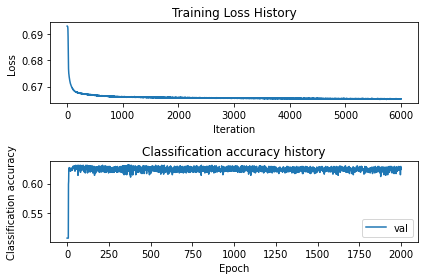

In [12]:
# test-case 1:
from MLP.evaluation import get_classification_accuracy
out_train = net_1.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ",acc)
out_val = net_1.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ",acc)
test_acc = (net_1.predict(x_test) == y_test).mean()
print('Test accuracy: ', test_acc)

# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error_1)
plt.title('Training Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
print()
plt.subplot(2, 1, 2)
#plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy_1, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# test-case 2:
input_size = 9
hidden_size = 5 # Hidden layer size (Hyper-parameter)
num_classes = 2 # Output

def init_model():
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)
    
    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net_2 = init_model()
net_2._modules[0].w = np.copy(net_1._modules[0].w)
net_2._modules[0].b = np.copy(net_1._modules[0].b)
net_2._modules[2].w = np.copy(net_1._modules[2].w)
net_2._modules[2].b = np.copy(net_1._modules[2].b)
optim = SGD(net_2, lr=0.00005, weight_decay=0.000)
loss_func = CrossEntropyLoss()
epoch = 6000
batch_size = 49000

#Initialize the trainer class by passing the above modules
trainer = Trainer(dataset, optim, net_2, loss_func, epoch, batch_size, validate_interval=3)

train_error_2, validation_accuracy_2 = trainer.train()

Epoch Average Loss: 0.665104589602574
Validate Acc: 0.619 Epoch: 0
Epoch Average Loss: 0.665102744315830
Epoch Average Loss: 0.665100960687550
Epoch Average Loss: 0.665099241661751
Validate Acc: 0.619 Epoch: 3
Epoch Average Loss: 0.665097580728264
Epoch Average Loss: 0.665095975918385
Epoch Average Loss: 0.665094426301999
Validate Acc: 0.620 Epoch: 6
Epoch Average Loss: 0.665092930984855
Epoch Average Loss: 0.665091485149606
Epoch Average Loss: 0.665090087887707
Validate Acc: 0.619 Epoch: 9
Epoch Average Loss: 0.665088736236664
Epoch Average Loss: 0.665087430072678
Epoch Average Loss: 0.665086167826379
Validate Acc: 0.619 Epoch: 12
Epoch Average Loss: 0.665084945782625
Epoch Average Loss: 0.665083766008752
Epoch Average Loss: 0.665082632098701
Validate Acc: 0.620 Epoch: 15
Epoch Average Loss: 0.665081538872136
Epoch Average Loss: 0.665080484569805
Epoch Average Loss: 0.665079465838353
Validate Acc: 0.620 Epoch: 18
Epoch Average Loss: 0.665078482168556
Epoch Average Loss: 0.665077534119

Epoch Average Loss: 0.665050465473803
Epoch Average Loss: 0.665050460241216
Validate Acc: 0.623 Epoch: 174
Epoch Average Loss: 0.665050455170030
Epoch Average Loss: 0.665050450254835
Epoch Average Loss: 0.665050445490402
Validate Acc: 0.623 Epoch: 177
Epoch Average Loss: 0.665050440871679
Epoch Average Loss: 0.665050436393783
Epoch Average Loss: 0.665050432051995
Validate Acc: 0.623 Epoch: 180
Epoch Average Loss: 0.665050427841756
Epoch Average Loss: 0.665050423758657
Epoch Average Loss: 0.665050419798440
Validate Acc: 0.623 Epoch: 183
Epoch Average Loss: 0.665050415956989
Epoch Average Loss: 0.665050412230327
Epoch Average Loss: 0.665050408614610
Validate Acc: 0.623 Epoch: 186
Epoch Average Loss: 0.665050405106122
Epoch Average Loss: 0.665050401718284
Epoch Average Loss: 0.665050398517097
Validate Acc: 0.623 Epoch: 189
Epoch Average Loss: 0.665050395408219
Epoch Average Loss: 0.665050392388563
Epoch Average Loss: 0.665050389455145
Validate Acc: 0.624 Epoch: 192
Epoch Average Loss: 0.6

Epoch Average Loss: 0.665050252451193
Validate Acc: 0.624 Epoch: 345
Epoch Average Loss: 0.665050252033418
Epoch Average Loss: 0.665050251616417
Epoch Average Loss: 0.665050251200175
Validate Acc: 0.624 Epoch: 348
Epoch Average Loss: 0.665050250784678
Epoch Average Loss: 0.665050250369911
Epoch Average Loss: 0.665050249955861
Validate Acc: 0.624 Epoch: 351
Epoch Average Loss: 0.665050249542514
Epoch Average Loss: 0.665050249129859
Epoch Average Loss: 0.665050248717882
Validate Acc: 0.624 Epoch: 354
Epoch Average Loss: 0.665050248306573
Epoch Average Loss: 0.665050247895918
Epoch Average Loss: 0.665050247485908
Validate Acc: 0.624 Epoch: 357
Epoch Average Loss: 0.665050247076531
Epoch Average Loss: 0.665050246667776
Epoch Average Loss: 0.665050246259635
Validate Acc: 0.624 Epoch: 360
Epoch Average Loss: 0.665050245852096
Epoch Average Loss: 0.665050245445151
Epoch Average Loss: 0.665050245038791
Validate Acc: 0.624 Epoch: 363
Epoch Average Loss: 0.665050244633005
Epoch Average Loss: 0.6

Epoch Average Loss: 0.665050186951365
Validate Acc: 0.624 Epoch: 522
Epoch Average Loss: 0.665050186622055
Epoch Average Loss: 0.665050186292978
Epoch Average Loss: 0.665050185964131
Validate Acc: 0.624 Epoch: 525
Epoch Average Loss: 0.665050185635514
Epoch Average Loss: 0.665050185307127
Epoch Average Loss: 0.665050184978969
Validate Acc: 0.624 Epoch: 528
Epoch Average Loss: 0.665050184651039
Epoch Average Loss: 0.665050184323336
Epoch Average Loss: 0.665050183995860
Validate Acc: 0.624 Epoch: 531
Epoch Average Loss: 0.665050183668610
Epoch Average Loss: 0.665050183341587
Epoch Average Loss: 0.665050183014788
Validate Acc: 0.624 Epoch: 534
Epoch Average Loss: 0.665050182688214
Epoch Average Loss: 0.665050182361863
Epoch Average Loss: 0.665050182035737
Validate Acc: 0.624 Epoch: 537
Epoch Average Loss: 0.665050181709832
Epoch Average Loss: 0.665050181384150
Epoch Average Loss: 0.665050181058690
Validate Acc: 0.624 Epoch: 540
Epoch Average Loss: 0.665050180733451
Epoch Average Loss: 0.6

Epoch Average Loss: 0.665050131858994
Validate Acc: 0.624 Epoch: 699
Epoch Average Loss: 0.665050131564191
Epoch Average Loss: 0.665050131269556
Epoch Average Loss: 0.665050130975088
Validate Acc: 0.624 Epoch: 702
Epoch Average Loss: 0.665050130680787
Epoch Average Loss: 0.665050130386653
Epoch Average Loss: 0.665050130092685
Validate Acc: 0.624 Epoch: 705
Epoch Average Loss: 0.665050129798883
Epoch Average Loss: 0.665050129505247
Epoch Average Loss: 0.665050129211776
Validate Acc: 0.624 Epoch: 708
Epoch Average Loss: 0.665050128918471
Epoch Average Loss: 0.665050128625331
Epoch Average Loss: 0.665050128332356
Validate Acc: 0.624 Epoch: 711
Epoch Average Loss: 0.665050128039545
Epoch Average Loss: 0.665050127746899
Epoch Average Loss: 0.665050127454416
Validate Acc: 0.624 Epoch: 714
Epoch Average Loss: 0.665050127162098
Epoch Average Loss: 0.665050126869942
Epoch Average Loss: 0.665050126577951
Validate Acc: 0.624 Epoch: 717
Epoch Average Loss: 0.665050126286122
Epoch Average Loss: 0.6

Epoch Average Loss: 0.665050082601539
Epoch Average Loss: 0.665050082332376
Epoch Average Loss: 0.665050082063339
Validate Acc: 0.624 Epoch: 876
Epoch Average Loss: 0.665050081794430
Epoch Average Loss: 0.665050081525647
Epoch Average Loss: 0.665050081256991
Validate Acc: 0.624 Epoch: 879
Epoch Average Loss: 0.665050080988462
Epoch Average Loss: 0.665050080720059
Epoch Average Loss: 0.665050080451782
Validate Acc: 0.624 Epoch: 882
Epoch Average Loss: 0.665050080183631
Epoch Average Loss: 0.665050079915605
Epoch Average Loss: 0.665050079647705
Validate Acc: 0.624 Epoch: 885
Epoch Average Loss: 0.665050079379931
Epoch Average Loss: 0.665050079112281
Epoch Average Loss: 0.665050078844756
Validate Acc: 0.624 Epoch: 888
Epoch Average Loss: 0.665050078577357
Epoch Average Loss: 0.665050078310081
Epoch Average Loss: 0.665050078042930
Validate Acc: 0.624 Epoch: 891
Epoch Average Loss: 0.665050077775903
Epoch Average Loss: 0.665050077509000
Epoch Average Loss: 0.665050077242221
Validate Acc: 0.

Epoch Average Loss: 0.665050037023189
Validate Acc: 0.624 Epoch: 1050
Epoch Average Loss: 0.665050036773637
Epoch Average Loss: 0.665050036524182
Epoch Average Loss: 0.665050036274823
Validate Acc: 0.624 Epoch: 1053
Epoch Average Loss: 0.665050036025561
Epoch Average Loss: 0.665050035776396
Epoch Average Loss: 0.665050035527326
Validate Acc: 0.624 Epoch: 1056
Epoch Average Loss: 0.665050035278353
Epoch Average Loss: 0.665050035029476
Epoch Average Loss: 0.665050034780694
Validate Acc: 0.624 Epoch: 1059
Epoch Average Loss: 0.665050034532008
Epoch Average Loss: 0.665050034283418
Epoch Average Loss: 0.665050034034923
Validate Acc: 0.624 Epoch: 1062
Epoch Average Loss: 0.665050033786523
Epoch Average Loss: 0.665050033538219
Epoch Average Loss: 0.665050033290009
Validate Acc: 0.624 Epoch: 1065
Epoch Average Loss: 0.665050033041894
Epoch Average Loss: 0.665050032793874
Epoch Average Loss: 0.665050032545948
Validate Acc: 0.624 Epoch: 1068
Epoch Average Loss: 0.665050032298117
Epoch Average Lo

Validate Acc: 0.624 Epoch: 1227
Epoch Average Loss: 0.665049993999806
Epoch Average Loss: 0.665049993765348
Epoch Average Loss: 0.665049993530964
Validate Acc: 0.624 Epoch: 1230
Epoch Average Loss: 0.665049993296653
Epoch Average Loss: 0.665049993062416
Epoch Average Loss: 0.665049992828252
Validate Acc: 0.624 Epoch: 1233
Epoch Average Loss: 0.665049992594161
Epoch Average Loss: 0.665049992360144
Epoch Average Loss: 0.665049992126200
Validate Acc: 0.624 Epoch: 1236
Epoch Average Loss: 0.665049991892328
Epoch Average Loss: 0.665049991658529
Epoch Average Loss: 0.665049991424803
Validate Acc: 0.624 Epoch: 1239
Epoch Average Loss: 0.665049991191150
Epoch Average Loss: 0.665049990957569
Epoch Average Loss: 0.665049990724061
Validate Acc: 0.624 Epoch: 1242
Epoch Average Loss: 0.665049990490625
Epoch Average Loss: 0.665049990257260
Epoch Average Loss: 0.665049990023968
Validate Acc: 0.624 Epoch: 1245
Epoch Average Loss: 0.665049989790748
Epoch Average Loss: 0.665049989557600
Epoch Average Lo

Epoch Average Loss: 0.665049954892792
Epoch Average Loss: 0.665049954669444
Epoch Average Loss: 0.665049954446153
Validate Acc: 0.624 Epoch: 1401
Epoch Average Loss: 0.665049954222919
Epoch Average Loss: 0.665049953999741
Epoch Average Loss: 0.665049953776620
Validate Acc: 0.624 Epoch: 1404
Epoch Average Loss: 0.665049953553556
Epoch Average Loss: 0.665049953330548
Epoch Average Loss: 0.665049953107597
Validate Acc: 0.624 Epoch: 1407
Epoch Average Loss: 0.665049952884701
Epoch Average Loss: 0.665049952661862
Epoch Average Loss: 0.665049952439080
Validate Acc: 0.624 Epoch: 1410
Epoch Average Loss: 0.665049952216353
Epoch Average Loss: 0.665049951993682
Epoch Average Loss: 0.665049951771067
Validate Acc: 0.624 Epoch: 1413
Epoch Average Loss: 0.665049951548508
Epoch Average Loss: 0.665049951326004
Epoch Average Loss: 0.665049951103556
Validate Acc: 0.624 Epoch: 1416
Epoch Average Loss: 0.665049950881164
Epoch Average Loss: 0.665049950658828
Epoch Average Loss: 0.665049950436546
Validate A

Epoch Average Loss: 0.665049881745277
Epoch Average Loss: 0.665049881537122
Validate Acc: 0.624 Epoch: 1740
Epoch Average Loss: 0.665049881329000
Epoch Average Loss: 0.665049881120913
Epoch Average Loss: 0.665049880912860
Validate Acc: 0.624 Epoch: 1743
Epoch Average Loss: 0.665049880704841
Epoch Average Loss: 0.665049880496857
Epoch Average Loss: 0.665049880288906
Validate Acc: 0.624 Epoch: 1746
Epoch Average Loss: 0.665049880080990
Epoch Average Loss: 0.665049879873108
Epoch Average Loss: 0.665049879665260
Validate Acc: 0.624 Epoch: 1749
Epoch Average Loss: 0.665049879457446
Epoch Average Loss: 0.665049879249666
Epoch Average Loss: 0.665049879041919
Validate Acc: 0.624 Epoch: 1752
Epoch Average Loss: 0.665049878834207
Epoch Average Loss: 0.665049878626528
Epoch Average Loss: 0.665049878418883
Validate Acc: 0.624 Epoch: 1755
Epoch Average Loss: 0.665049878211272
Epoch Average Loss: 0.665049878003694
Epoch Average Loss: 0.665049877796150
Validate Acc: 0.624 Epoch: 1758
Epoch Average Lo

Epoch Average Loss: 0.665049847545898
Validate Acc: 0.624 Epoch: 1908
Epoch Average Loss: 0.665049847339857
Epoch Average Loss: 0.665049847133887
Epoch Average Loss: 0.665049846927986
Validate Acc: 0.624 Epoch: 1911
Epoch Average Loss: 0.665049846722153
Epoch Average Loss: 0.665049846516387
Epoch Average Loss: 0.665049846310687
Validate Acc: 0.624 Epoch: 1914
Epoch Average Loss: 0.665049846105052
Epoch Average Loss: 0.665049845899480
Epoch Average Loss: 0.665049845693970
Validate Acc: 0.624 Epoch: 1917
Epoch Average Loss: 0.665049845488522
Epoch Average Loss: 0.665049845283133
Epoch Average Loss: 0.665049845077805
Validate Acc: 0.624 Epoch: 1920
Epoch Average Loss: 0.665049844872534
Epoch Average Loss: 0.665049844667320
Epoch Average Loss: 0.665049844462163
Validate Acc: 0.624 Epoch: 1923
Epoch Average Loss: 0.665049844257062
Epoch Average Loss: 0.665049844052015
Epoch Average Loss: 0.665049843847022
Validate Acc: 0.624 Epoch: 1926
Epoch Average Loss: 0.665049843642083
Epoch Average Lo

Epoch Average Loss: 0.665049812576579
Epoch Average Loss: 0.665049812381273
Validate Acc: 0.624 Epoch: 2085
Epoch Average Loss: 0.665049812185979
Epoch Average Loss: 0.665049811990698
Epoch Average Loss: 0.665049811795430
Validate Acc: 0.624 Epoch: 2088
Epoch Average Loss: 0.665049811600175
Epoch Average Loss: 0.665049811404932
Epoch Average Loss: 0.665049811209703
Validate Acc: 0.624 Epoch: 2091
Epoch Average Loss: 0.665049811014486
Epoch Average Loss: 0.665049810819281
Epoch Average Loss: 0.665049810624089
Validate Acc: 0.624 Epoch: 2094
Epoch Average Loss: 0.665049810428910
Epoch Average Loss: 0.665049810233743
Epoch Average Loss: 0.665049810038589
Validate Acc: 0.624 Epoch: 2097
Epoch Average Loss: 0.665049809843448
Epoch Average Loss: 0.665049809648319
Epoch Average Loss: 0.665049809453202
Validate Acc: 0.624 Epoch: 2100
Epoch Average Loss: 0.665049809258098
Epoch Average Loss: 0.665049809063005
Epoch Average Loss: 0.665049808867926
Validate Acc: 0.624 Epoch: 2103
Epoch Average Lo

Epoch Average Loss: 0.665049778767465
Epoch Average Loss: 0.665049778574088
Validate Acc: 0.624 Epoch: 2259
Epoch Average Loss: 0.665049778380721
Epoch Average Loss: 0.665049778187363
Epoch Average Loss: 0.665049777994015
Validate Acc: 0.624 Epoch: 2262
Epoch Average Loss: 0.665049777800677
Epoch Average Loss: 0.665049777607349
Epoch Average Loss: 0.665049777414031
Validate Acc: 0.624 Epoch: 2265
Epoch Average Loss: 0.665049777220722
Epoch Average Loss: 0.665049777027423
Epoch Average Loss: 0.665049776834133
Validate Acc: 0.624 Epoch: 2268
Epoch Average Loss: 0.665049776640854
Epoch Average Loss: 0.665049776447583
Epoch Average Loss: 0.665049776254323
Validate Acc: 0.624 Epoch: 2271
Epoch Average Loss: 0.665049776061072
Epoch Average Loss: 0.665049775867831
Epoch Average Loss: 0.665049775674600
Validate Acc: 0.624 Epoch: 2274
Epoch Average Loss: 0.665049775481378
Epoch Average Loss: 0.665049775288166
Epoch Average Loss: 0.665049775094963
Validate Acc: 0.624 Epoch: 2277
Epoch Average Lo

Epoch Average Loss: 0.665049744681671
Epoch Average Loss: 0.665049744489849
Validate Acc: 0.624 Epoch: 2436
Epoch Average Loss: 0.665049744298036
Epoch Average Loss: 0.665049744106230
Epoch Average Loss: 0.665049743914433
Validate Acc: 0.624 Epoch: 2439
Epoch Average Loss: 0.665049743722643
Epoch Average Loss: 0.665049743530861
Epoch Average Loss: 0.665049743339086
Validate Acc: 0.624 Epoch: 2442
Epoch Average Loss: 0.665049743147320
Epoch Average Loss: 0.665049742955561
Epoch Average Loss: 0.665049742763810
Validate Acc: 0.624 Epoch: 2445
Epoch Average Loss: 0.665049742572067
Epoch Average Loss: 0.665049742380332
Epoch Average Loss: 0.665049742188604
Validate Acc: 0.624 Epoch: 2448
Epoch Average Loss: 0.665049741996884
Epoch Average Loss: 0.665049741805172
Epoch Average Loss: 0.665049741613468
Validate Acc: 0.624 Epoch: 2451
Epoch Average Loss: 0.665049741421771
Epoch Average Loss: 0.665049741230082
Epoch Average Loss: 0.665049741038400
Validate Acc: 0.624 Epoch: 2454
Epoch Average Lo

Epoch Average Loss: 0.665049711415331
Epoch Average Loss: 0.665049711224745
Validate Acc: 0.624 Epoch: 2610
Epoch Average Loss: 0.665049711034165
Epoch Average Loss: 0.665049710843592
Epoch Average Loss: 0.665049710653026
Validate Acc: 0.624 Epoch: 2613
Epoch Average Loss: 0.665049710462465
Epoch Average Loss: 0.665049710271912
Epoch Average Loss: 0.665049710081364
Validate Acc: 0.624 Epoch: 2616
Epoch Average Loss: 0.665049709890823
Epoch Average Loss: 0.665049709700288
Epoch Average Loss: 0.665049709509760
Validate Acc: 0.624 Epoch: 2619
Epoch Average Loss: 0.665049709319237
Epoch Average Loss: 0.665049709128722
Epoch Average Loss: 0.665049708938212
Validate Acc: 0.624 Epoch: 2622
Epoch Average Loss: 0.665049708747709
Epoch Average Loss: 0.665049708557212
Epoch Average Loss: 0.665049708366721
Validate Acc: 0.624 Epoch: 2625
Epoch Average Loss: 0.665049708176237
Epoch Average Loss: 0.665049707985759
Epoch Average Loss: 0.665049707795287
Validate Acc: 0.624 Epoch: 2628
Epoch Average Lo

Epoch Average Loss: 0.665049678343645
Epoch Average Loss: 0.665049678154069
Validate Acc: 0.624 Epoch: 2784
Epoch Average Loss: 0.665049677964499
Epoch Average Loss: 0.665049677774934
Epoch Average Loss: 0.665049677585374
Validate Acc: 0.624 Epoch: 2787
Epoch Average Loss: 0.665049677395819
Epoch Average Loss: 0.665049677206270
Epoch Average Loss: 0.665049677016725
Validate Acc: 0.624 Epoch: 2790
Epoch Average Loss: 0.665049676827186
Epoch Average Loss: 0.665049676637652
Epoch Average Loss: 0.665049676448124
Validate Acc: 0.624 Epoch: 2793
Epoch Average Loss: 0.665049676258600
Epoch Average Loss: 0.665049676069082
Epoch Average Loss: 0.665049675879569
Validate Acc: 0.624 Epoch: 2796
Epoch Average Loss: 0.665049675690061
Epoch Average Loss: 0.665049675500558
Epoch Average Loss: 0.665049675311061
Validate Acc: 0.624 Epoch: 2799
Epoch Average Loss: 0.665049675121569
Epoch Average Loss: 0.665049674932081
Epoch Average Loss: 0.665049674742599
Validate Acc: 0.624 Epoch: 2802
Epoch Average Lo

Epoch Average Loss: 0.665049644865682
Epoch Average Loss: 0.665049644676954
Validate Acc: 0.624 Epoch: 2961
Epoch Average Loss: 0.665049644488230
Epoch Average Loss: 0.665049644299511
Epoch Average Loss: 0.665049644110795
Validate Acc: 0.624 Epoch: 2964
Epoch Average Loss: 0.665049643922085
Epoch Average Loss: 0.665049643733378
Epoch Average Loss: 0.665049643544676
Validate Acc: 0.624 Epoch: 2967
Epoch Average Loss: 0.665049643355978
Epoch Average Loss: 0.665049643167285
Epoch Average Loss: 0.665049642978596
Validate Acc: 0.624 Epoch: 2970
Epoch Average Loss: 0.665049642789911
Epoch Average Loss: 0.665049642601231
Epoch Average Loss: 0.665049642412554
Validate Acc: 0.624 Epoch: 2973
Epoch Average Loss: 0.665049642223882
Epoch Average Loss: 0.665049642035215
Epoch Average Loss: 0.665049641846552
Validate Acc: 0.624 Epoch: 2976
Epoch Average Loss: 0.665049641657892
Epoch Average Loss: 0.665049641469238
Epoch Average Loss: 0.665049641280587
Validate Acc: 0.624 Epoch: 2979
Epoch Average Lo

Validate Acc: 0.624 Epoch: 3132
Epoch Average Loss: 0.665049612276889
Epoch Average Loss: 0.665049612088852
Epoch Average Loss: 0.665049611900819
Validate Acc: 0.624 Epoch: 3135
Epoch Average Loss: 0.665049611712790
Epoch Average Loss: 0.665049611524764
Epoch Average Loss: 0.665049611336742
Validate Acc: 0.624 Epoch: 3138
Epoch Average Loss: 0.665049611148723
Epoch Average Loss: 0.665049610960708
Epoch Average Loss: 0.665049610772697
Validate Acc: 0.624 Epoch: 3141
Epoch Average Loss: 0.665049610584689
Epoch Average Loss: 0.665049610396686
Epoch Average Loss: 0.665049610208685
Validate Acc: 0.624 Epoch: 3144
Epoch Average Loss: 0.665049610020688
Epoch Average Loss: 0.665049609832695
Epoch Average Loss: 0.665049609644706
Validate Acc: 0.624 Epoch: 3147
Epoch Average Loss: 0.665049609456720
Epoch Average Loss: 0.665049609268738
Epoch Average Loss: 0.665049609080759
Validate Acc: 0.624 Epoch: 3150
Epoch Average Loss: 0.665049608892784
Epoch Average Loss: 0.665049608704813
Epoch Average Lo

Epoch Average Loss: 0.665049578860945
Epoch Average Loss: 0.665049578673509
Validate Acc: 0.624 Epoch: 3312
Epoch Average Loss: 0.665049578486075
Epoch Average Loss: 0.665049578298645
Epoch Average Loss: 0.665049578111218
Validate Acc: 0.624 Epoch: 3315
Epoch Average Loss: 0.665049577923794
Epoch Average Loss: 0.665049577736373
Epoch Average Loss: 0.665049577548955
Validate Acc: 0.624 Epoch: 3318
Epoch Average Loss: 0.665049577361540
Epoch Average Loss: 0.665049577174128
Epoch Average Loss: 0.665049576986720
Validate Acc: 0.624 Epoch: 3321
Epoch Average Loss: 0.665049576799314
Epoch Average Loss: 0.665049576611912
Epoch Average Loss: 0.665049576424512
Validate Acc: 0.624 Epoch: 3324
Epoch Average Loss: 0.665049576237116
Epoch Average Loss: 0.665049576049723
Epoch Average Loss: 0.665049575862332
Validate Acc: 0.624 Epoch: 3327
Epoch Average Loss: 0.665049575674945
Epoch Average Loss: 0.665049575487561
Epoch Average Loss: 0.665049575300180
Validate Acc: 0.624 Epoch: 3330
Epoch Average Lo

Epoch Average Loss: 0.665049546291419
Epoch Average Loss: 0.665049546104483
Validate Acc: 0.624 Epoch: 3486
Epoch Average Loss: 0.665049545917550
Epoch Average Loss: 0.665049545730620
Epoch Average Loss: 0.665049545543693
Validate Acc: 0.624 Epoch: 3489
Epoch Average Loss: 0.665049545356768
Epoch Average Loss: 0.665049545169845
Epoch Average Loss: 0.665049544982926
Validate Acc: 0.624 Epoch: 3492
Epoch Average Loss: 0.665049544796009
Epoch Average Loss: 0.665049544609094
Epoch Average Loss: 0.665049544422183
Validate Acc: 0.624 Epoch: 3495
Epoch Average Loss: 0.665049544235274
Epoch Average Loss: 0.665049544048368
Epoch Average Loss: 0.665049543861464
Validate Acc: 0.624 Epoch: 3498
Epoch Average Loss: 0.665049543674563
Epoch Average Loss: 0.665049543487664
Epoch Average Loss: 0.665049543300769
Validate Acc: 0.624 Epoch: 3501
Epoch Average Loss: 0.665049543113875
Epoch Average Loss: 0.665049542926985
Epoch Average Loss: 0.665049542740097
Validate Acc: 0.624 Epoch: 3504
Epoch Average Lo

Epoch Average Loss: 0.665049513243484
Epoch Average Loss: 0.665049513056988
Validate Acc: 0.624 Epoch: 3663
Epoch Average Loss: 0.665049512870495
Epoch Average Loss: 0.665049512684005
Epoch Average Loss: 0.665049512497516
Validate Acc: 0.624 Epoch: 3666
Epoch Average Loss: 0.665049512311030
Epoch Average Loss: 0.665049512124547
Epoch Average Loss: 0.665049511938065
Validate Acc: 0.624 Epoch: 3669
Epoch Average Loss: 0.665049511751586
Epoch Average Loss: 0.665049511565109
Epoch Average Loss: 0.665049511378635
Validate Acc: 0.624 Epoch: 3672
Epoch Average Loss: 0.665049511192163
Epoch Average Loss: 0.665049511005693
Epoch Average Loss: 0.665049510819225
Validate Acc: 0.624 Epoch: 3675
Epoch Average Loss: 0.665049510632760
Epoch Average Loss: 0.665049510446297
Epoch Average Loss: 0.665049510259836
Validate Acc: 0.624 Epoch: 3678
Epoch Average Loss: 0.665049510073378
Epoch Average Loss: 0.665049509886921
Epoch Average Loss: 0.665049509700468
Validate Acc: 0.624 Epoch: 3681
Epoch Average Lo

Epoch Average Loss: 0.665049481288619
Validate Acc: 0.624 Epoch: 3834
Epoch Average Loss: 0.665049481103408
Epoch Average Loss: 0.665049480917873
Epoch Average Loss: 0.665049480733073
Validate Acc: 0.624 Epoch: 3837
Epoch Average Loss: 0.665049480547168
Epoch Average Loss: 0.665049480362744
Epoch Average Loss: 0.665049480176502
Validate Acc: 0.624 Epoch: 3840
Epoch Average Loss: 0.665049479992423
Epoch Average Loss: 0.665049479805956
Epoch Average Loss: 0.665049479622021
Validate Acc: 0.624 Epoch: 3843
Epoch Average Loss: 0.665049479435658
Epoch Average Loss: 0.665049479251409
Epoch Average Loss: 0.665049479065367
Validate Acc: 0.624 Epoch: 3846
Epoch Average Loss: 0.665049478880836
Epoch Average Loss: 0.665049478695084
Epoch Average Loss: 0.665049478510301
Validate Acc: 0.624 Epoch: 3849
Epoch Average Loss: 0.665049478324808
Epoch Average Loss: 0.665049478139803
Epoch Average Loss: 0.665049477954539
Validate Acc: 0.624 Epoch: 3852
Epoch Average Loss: 0.665049477769340
Epoch Average Lo

Epoch Average Loss: 0.665049448386569
Epoch Average Loss: 0.665049448202457
Epoch Average Loss: 0.665049448018259
Validate Acc: 0.624 Epoch: 4014
Epoch Average Loss: 0.665049447833079
Epoch Average Loss: 0.665049447649620
Epoch Average Loss: 0.665049447464809
Validate Acc: 0.624 Epoch: 4017
Epoch Average Loss: 0.665049447279904
Epoch Average Loss: 0.665049447096550
Epoch Average Loss: 0.665049446911402
Validate Acc: 0.624 Epoch: 4020
Epoch Average Loss: 0.665049446727108
Epoch Average Loss: 0.665049446543181
Epoch Average Loss: 0.665049446358061
Validate Acc: 0.624 Epoch: 4023
Epoch Average Loss: 0.665049446174324
Epoch Average Loss: 0.665049445989878
Epoch Average Loss: 0.665049445804786
Validate Acc: 0.624 Epoch: 4026
Epoch Average Loss: 0.665049445621551
Epoch Average Loss: 0.665049445436640
Epoch Average Loss: 0.665049445251863
Validate Acc: 0.624 Epoch: 4029
Epoch Average Loss: 0.665049445068504
Epoch Average Loss: 0.665049444883441
Epoch Average Loss: 0.665049444699135
Validate A

Epoch Average Loss: 0.665049416916940
Epoch Average Loss: 0.665049416734149
Epoch Average Loss: 0.665049416550362
Validate Acc: 0.624 Epoch: 4185
Epoch Average Loss: 0.665049416366382
Epoch Average Loss: 0.665049416182416
Epoch Average Loss: 0.665049415999612
Validate Acc: 0.624 Epoch: 4188
Epoch Average Loss: 0.665049415815875
Epoch Average Loss: 0.665049415631920
Epoch Average Loss: 0.665049415447979
Validate Acc: 0.624 Epoch: 4191
Epoch Average Loss: 0.665049415265104
Epoch Average Loss: 0.665049415081473
Epoch Average Loss: 0.665049414897543
Validate Acc: 0.624 Epoch: 4194
Epoch Average Loss: 0.665049414713627
Epoch Average Loss: 0.665049414530625
Epoch Average Loss: 0.665049414347156
Validate Acc: 0.624 Epoch: 4197
Epoch Average Loss: 0.665049414163250
Epoch Average Loss: 0.665049413979358
Epoch Average Loss: 0.665049413796178
Validate Acc: 0.624 Epoch: 4200
Epoch Average Loss: 0.665049413612923
Epoch Average Loss: 0.665049413429041
Epoch Average Loss: 0.665049413245173
Validate A

Epoch Average Loss: 0.665049385763163
Validate Acc: 0.624 Epoch: 4353
Epoch Average Loss: 0.665049385580601
Epoch Average Loss: 0.665049385397614
Epoch Average Loss: 0.665049385214635
Validate Acc: 0.624 Epoch: 4356
Epoch Average Loss: 0.665049385031665
Epoch Average Loss: 0.665049384848704
Epoch Average Loss: 0.665049384665750
Validate Acc: 0.624 Epoch: 4359
Epoch Average Loss: 0.665049384482935
Epoch Average Loss: 0.665049384300603
Epoch Average Loss: 0.665049384117653
Validate Acc: 0.624 Epoch: 4362
Epoch Average Loss: 0.665049383934712
Epoch Average Loss: 0.665049383751778
Epoch Average Loss: 0.665049383568853
Validate Acc: 0.624 Epoch: 4365
Epoch Average Loss: 0.665049383385937
Epoch Average Loss: 0.665049383203028
Epoch Average Loss: 0.665049383020581
Validate Acc: 0.624 Epoch: 4368
Epoch Average Loss: 0.665049382837938
Epoch Average Loss: 0.665049382655032
Epoch Average Loss: 0.665049382472135
Validate Acc: 0.624 Epoch: 4371
Epoch Average Loss: 0.665049382289245
Epoch Average Lo

Epoch Average Loss: 0.665049354919668
Epoch Average Loss: 0.665049354737531
Epoch Average Loss: 0.665049354555398
Validate Acc: 0.624 Epoch: 4524
Epoch Average Loss: 0.665049354373270
Epoch Average Loss: 0.665049354191147
Epoch Average Loss: 0.665049354009029
Validate Acc: 0.624 Epoch: 4527
Epoch Average Loss: 0.665049353826915
Epoch Average Loss: 0.665049353644807
Epoch Average Loss: 0.665049353462703
Validate Acc: 0.624 Epoch: 4530
Epoch Average Loss: 0.665049353280604
Epoch Average Loss: 0.665049353098510
Epoch Average Loss: 0.665049352916420
Validate Acc: 0.624 Epoch: 4533
Epoch Average Loss: 0.665049352734336
Epoch Average Loss: 0.665049352552256
Epoch Average Loss: 0.665049352370180
Validate Acc: 0.624 Epoch: 4536
Epoch Average Loss: 0.665049352188110
Epoch Average Loss: 0.665049352006044
Epoch Average Loss: 0.665049351823983
Validate Acc: 0.624 Epoch: 4539
Epoch Average Loss: 0.665049351641926
Epoch Average Loss: 0.665049351459874
Epoch Average Loss: 0.665049351277827
Validate A

Epoch Average Loss: 0.665049323110818
Epoch Average Loss: 0.665049322929402
Validate Acc: 0.624 Epoch: 4698
Epoch Average Loss: 0.665049322747991
Epoch Average Loss: 0.665049322566583
Epoch Average Loss: 0.665049322385179
Validate Acc: 0.624 Epoch: 4701
Epoch Average Loss: 0.665049322203779
Epoch Average Loss: 0.665049322022382
Epoch Average Loss: 0.665049321840989
Validate Acc: 0.624 Epoch: 4704
Epoch Average Loss: 0.665049321659600
Epoch Average Loss: 0.665049321478214
Epoch Average Loss: 0.665049321296833
Validate Acc: 0.624 Epoch: 4707
Epoch Average Loss: 0.665049321115455
Epoch Average Loss: 0.665049320934080
Epoch Average Loss: 0.665049320752709
Validate Acc: 0.624 Epoch: 4710
Epoch Average Loss: 0.665049320571342
Epoch Average Loss: 0.665049320389979
Epoch Average Loss: 0.665049320208619
Validate Acc: 0.624 Epoch: 4713
Epoch Average Loss: 0.665049320027263
Epoch Average Loss: 0.665049319845911
Epoch Average Loss: 0.665049319664562
Validate Acc: 0.624 Epoch: 4716
Epoch Average Lo

Epoch Average Loss: 0.665049261132549
Epoch Average Loss: 0.665049260948262
Epoch Average Loss: 0.665049260763986
Validate Acc: 0.624 Epoch: 5040
Epoch Average Loss: 0.665049260579720
Epoch Average Loss: 0.665049260395463
Epoch Average Loss: 0.665049260211217
Validate Acc: 0.624 Epoch: 5043
Epoch Average Loss: 0.665049260026979
Epoch Average Loss: 0.665049259842750
Epoch Average Loss: 0.665049259658530
Validate Acc: 0.624 Epoch: 5046
Epoch Average Loss: 0.665049259474319
Epoch Average Loss: 0.665049259290115
Epoch Average Loss: 0.665049259105920
Validate Acc: 0.624 Epoch: 5049
Epoch Average Loss: 0.665049258921732
Epoch Average Loss: 0.665049258737552
Epoch Average Loss: 0.665049258553379
Validate Acc: 0.624 Epoch: 5052
Epoch Average Loss: 0.665049258369213
Epoch Average Loss: 0.665049258185054
Epoch Average Loss: 0.665049258000901
Validate Acc: 0.624 Epoch: 5055
Epoch Average Loss: 0.665049257816755
Epoch Average Loss: 0.665049257632615
Epoch Average Loss: 0.665049257448482
Validate A

Epoch Average Loss: 0.665049229857527
Validate Acc: 0.624 Epoch: 5208
Epoch Average Loss: 0.665049229673689
Epoch Average Loss: 0.665049229489851
Epoch Average Loss: 0.665049229306015
Validate Acc: 0.624 Epoch: 5211
Epoch Average Loss: 0.665049229122180
Epoch Average Loss: 0.665049228938346
Epoch Average Loss: 0.665049228754513
Validate Acc: 0.624 Epoch: 5214
Epoch Average Loss: 0.665049228570680
Epoch Average Loss: 0.665049228386849
Epoch Average Loss: 0.665049228203019
Validate Acc: 0.624 Epoch: 5217
Epoch Average Loss: 0.665049228019190
Epoch Average Loss: 0.665049227835362
Epoch Average Loss: 0.665049227651534
Validate Acc: 0.624 Epoch: 5220
Epoch Average Loss: 0.665049227467708
Epoch Average Loss: 0.665049227283883
Epoch Average Loss: 0.665049227100059
Validate Acc: 0.624 Epoch: 5223
Epoch Average Loss: 0.665049226916235
Epoch Average Loss: 0.665049226732413
Epoch Average Loss: 0.665049226548592
Validate Acc: 0.624 Epoch: 5226
Epoch Average Loss: 0.665049226364771
Epoch Average Lo

Epoch Average Loss: 0.665049167222896
Epoch Average Loss: 0.665049167039369
Validate Acc: 0.624 Epoch: 5550
Epoch Average Loss: 0.665049166855844
Epoch Average Loss: 0.665049166672320
Epoch Average Loss: 0.665049166488796
Validate Acc: 0.624 Epoch: 5553
Epoch Average Loss: 0.665049166305273
Epoch Average Loss: 0.665049166121751
Epoch Average Loss: 0.665049165938230
Validate Acc: 0.624 Epoch: 5556
Epoch Average Loss: 0.665049165754710
Epoch Average Loss: 0.665049165571191
Epoch Average Loss: 0.665049165387672
Validate Acc: 0.624 Epoch: 5559
Epoch Average Loss: 0.665049165204155
Epoch Average Loss: 0.665049165020638
Epoch Average Loss: 0.665049164837122
Validate Acc: 0.624 Epoch: 5562
Epoch Average Loss: 0.665049164653607
Epoch Average Loss: 0.665049164470093
Epoch Average Loss: 0.665049164286579
Validate Acc: 0.624 Epoch: 5565
Epoch Average Loss: 0.665049164103067
Epoch Average Loss: 0.665049163919556
Epoch Average Loss: 0.665049163736045
Validate Acc: 0.624 Epoch: 5568
Epoch Average Lo

Epoch Average Loss: 0.665049135118736
Validate Acc: 0.624 Epoch: 5724
Epoch Average Loss: 0.665049134935357
Epoch Average Loss: 0.665049134751979
Epoch Average Loss: 0.665049134568602
Validate Acc: 0.624 Epoch: 5727
Epoch Average Loss: 0.665049134385225
Epoch Average Loss: 0.665049134201850
Epoch Average Loss: 0.665049134018475
Validate Acc: 0.624 Epoch: 5730
Epoch Average Loss: 0.665049133835101
Epoch Average Loss: 0.665049133651728
Epoch Average Loss: 0.665049133468356
Validate Acc: 0.624 Epoch: 5733
Epoch Average Loss: 0.665049133284985
Epoch Average Loss: 0.665049133101614
Epoch Average Loss: 0.665049132918245
Validate Acc: 0.624 Epoch: 5736
Epoch Average Loss: 0.665049132734876
Epoch Average Loss: 0.665049132551507
Epoch Average Loss: 0.665049132368140
Validate Acc: 0.624 Epoch: 5739
Epoch Average Loss: 0.665049132184774
Epoch Average Loss: 0.665049132001408
Epoch Average Loss: 0.665049131818043
Validate Acc: 0.624 Epoch: 5742
Epoch Average Loss: 0.665049131634679
Epoch Average Lo

Epoch Average Loss: 0.665049103274036
Validate Acc: 0.624 Epoch: 5898
Epoch Average Loss: 0.665049103092218
Epoch Average Loss: 0.665049102910296
Epoch Average Loss: 0.665049102728395
Validate Acc: 0.624 Epoch: 5901
Epoch Average Loss: 0.665049102546513
Epoch Average Loss: 0.665049102365061
Epoch Average Loss: 0.665049102183274
Validate Acc: 0.624 Epoch: 5904
Epoch Average Loss: 0.665049102001420
Epoch Average Loss: 0.665049101819584
Epoch Average Loss: 0.665049101637767
Validate Acc: 0.624 Epoch: 5907
Epoch Average Loss: 0.665049101456111
Epoch Average Loss: 0.665049101274602
Epoch Average Loss: 0.665049101092808
Validate Acc: 0.624 Epoch: 5910
Epoch Average Loss: 0.665049100911031
Epoch Average Loss: 0.665049100729270
Epoch Average Loss: 0.665049100547524
Validate Acc: 0.624 Epoch: 5913
Epoch Average Loss: 0.665049100365818
Epoch Average Loss: 0.665049100184442
Epoch Average Loss: 0.665049100002716
Validate Acc: 0.624 Epoch: 5916
Epoch Average Loss: 0.665049099821005
Epoch Average Lo

Training acc:  0.6036326530612245
Validation acc:  0.624
Test accuracy:  0.6151439299123905


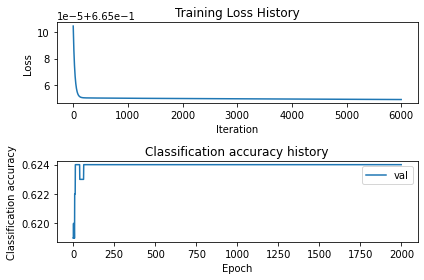

In [11]:
# test-case 2:
from MLP.evaluation import get_classification_accuracy
out_train = net_2.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ",acc)
out_val = net_2.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ",acc)
test_acc = (net_2.predict(x_test) == y_test).mean()
print('Test accuracy: ', test_acc)

# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error_2)
plt.title('Training Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
#plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy_2, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
print("trainins set")
out_train = net_2.predict(x_train)
tp = 0
fp = 0
fn = 0
num_correct = 0
num_samples = out_train.shape[0]
for i in range(out_train.shape[0]):
    if out_train[i] == y_train[i]:
        num_correct += 1
    if y_train[i] == 1:
        if out_train[i] == 1:
            tp += 1
        else:
            fn += 1
    if y_train[i] == 0:
        if out_train[i] == 1:
            fp += 1
acc = float(num_correct) / num_samples
print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("precision: ", tp/(tp+fp))
print("recall: ", tp/(tp+fn))

trainins set
Got 29578 / 49000 correct (60.36)
tp:  14348
fp:  8641
fn:  10781
precision:  0.6241245813215016
recall:  0.5709737753193521


In [15]:
print("validation set")
out_val = net_2.predict(x_val)
tp = 0
fp = 0
fn = 0
num_correct = 0
num_samples = out_val.shape[0]
for i in range(out_val.shape[0]):
    if out_val[i] == y_val[i]:
        num_correct += 1
    if y_val[i] == 1:
        if out_val[i] == 1:
            tp += 1
        else:
            fn += 1
    if y_val[i] == 0:
        if out_val[i] == 1:
            fp += 1
acc = float(num_correct) / num_samples
print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("precision: ", tp/(tp+fp))
print("recall: ", tp/(tp+fn))

validation set
Got 624 / 1000 correct (62.40)
tp:  312
fp:  180
fn:  196
precision:  0.6341463414634146
recall:  0.6141732283464567


In [16]:
print("testing set")
out_test = net_2.predict(x_test)
tp = 0
fp = 0
fn = 0
num_correct = 0
num_samples = out_test.shape[0]
for i in range(out_test.shape[0]):
    if out_test[i] == y_test[i]:
        num_correct += 1
    if y_test[i] == 1:
        if out_test[i] == 1:
            tp += 1
        else:
            fn += 1
    if y_test[i] == 0:
        if out_test[i] == 1:
            fp += 1
acc = float(num_correct) / num_samples
print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("precision: ", tp/(tp+fp))
print("recall: ", tp/(tp+fn))

testing set
Got 983 / 1598 correct (61.51)
tp:  462
fp:  286
fn:  329
precision:  0.6176470588235294
recall:  0.584070796460177
